In [6]:
import numpy as np

Np= 5
Nf= 4
A= np.random.randn(Np, Nf)
w= np.random.randn(Nf)
y= A@w
ATA= A.T@A
ATAinv= np.linalg.inv(ATA)
ATy= A.T@y
w_hat= ATAinv@ATy
w_hat= np.dot(np.linalg.pinv(A), y)
print(w_hat)
print('Result_obtained_by_applying_the_LLS_method: ')
print('estimated_vector_w_is: ', w)
e= y-A@w_hat
print('square_error_|y-A*what|^2: ' , np.linalg.norm(e)**2)

[0.92357012 0.55201366 0.58426159 0.88726345]
Result_obtained_by_applying_the_LLS_method: 
estimated_vector_w_is:  [0.92357012 0.55201366 0.58426159 0.88726345]
square_error_|y-A*what|^2:  5.143003323491674e-30


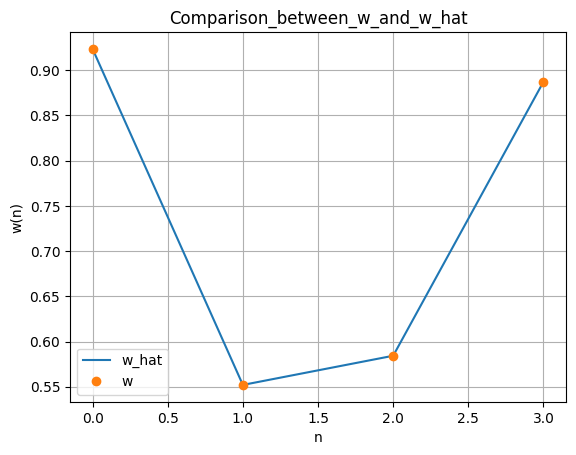

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(w_hat, label='w_hat')
plt.plot(w, 'o', label= 'w')
plt.xlabel('n')
plt.ylabel('w(n)')
plt.legend()
plt.grid()
plt.title('Comparison_between_w_and_w_hat')
plt.show()

LLS _:
the_optimum_weight_vector_is:_
[ 0.25059457  2.51278929 -1.29011318 -0.52646062]


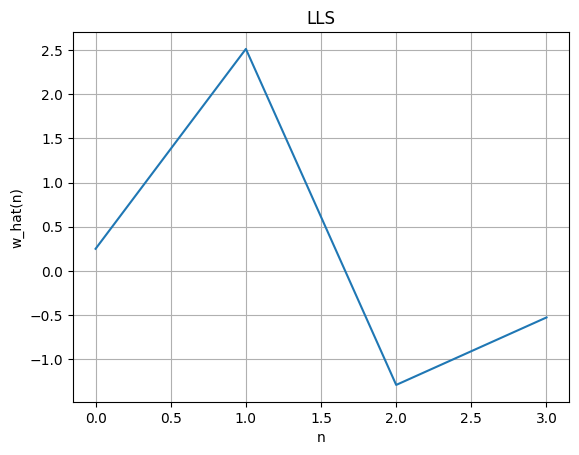

In [8]:


class SolveMinProbl:
    def __init__(self, y=np.ones((3,)), A=np.eye(3)):
        self.matr = A
        self.Np = y.shape[0]
        self.Nf = A.shape[1]
        self.vect = y
        self.sol = np.zeros((self.Nf,), dtype=float)

    def plot_w_hat(self, title='Solution'):
        w_hat = self.sol
        n = np.arange(self.Nf)
        plt.figure()
        plt.plot(n, w_hat)
        plt.xlabel('n')
        plt.ylabel('w_hat(n)')
        plt.title(title)
        plt.grid()
        plt.show()

    def print_result(self, title):
        print(title, '_:')
        print('the_optimum_weight_vector_is:_')
        print(self.sol)

class SolveLLS(SolveMinProbl):
    def __init__(self, y=np.ones((3,)), A=np.eye(3)):
          super().__init__(y, A)

    def run(self):
        A = self.matr
        y = self.vect
        w_hat = np.linalg.inv(A.T @ A) @ (A.T @ y)
        self.sol = w_hat
        self.min = np.linalg.norm(A @ w_hat - y) ** 2

if __name__ == "__main__":
    Np = 100
    Nf = 4
    A = np.random.randn(Np, Nf)
    w = np.random.randn(Nf, )
    y = A @ w
    m = SolveLLS(y, A)
    m.run()
    m.print_result('LLS')
    m.plot_w_hat('LLS')


Grad _:
the_optimum_weight_vector_is:_
[ 0.92868601 -0.80382549  1.56597769 -0.74951992]


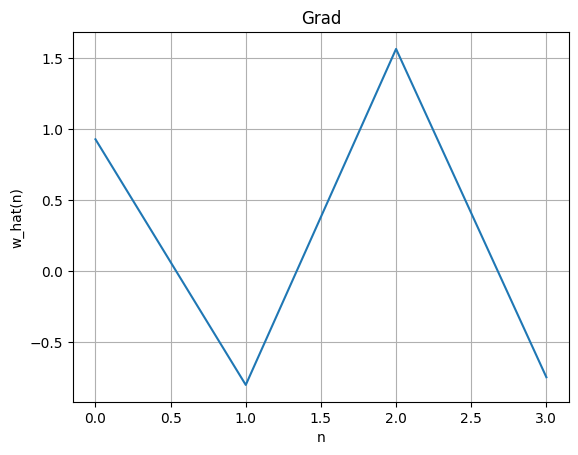

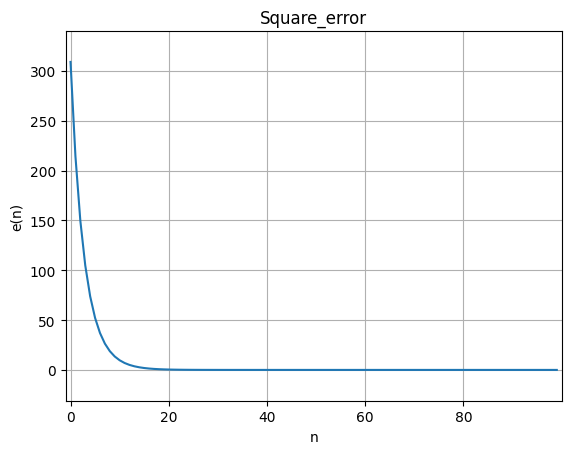

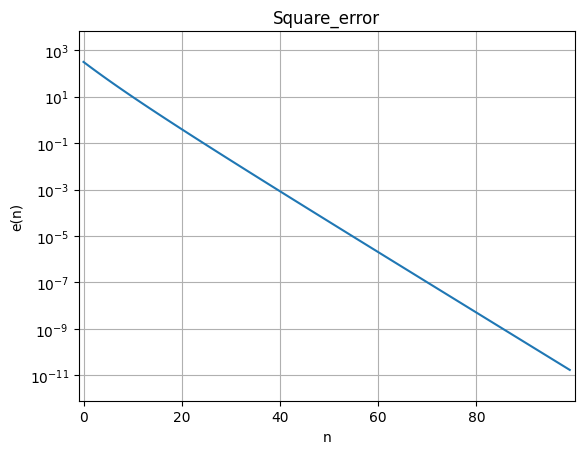

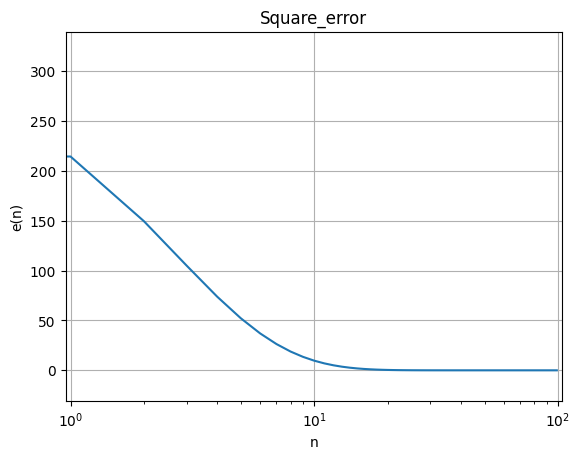

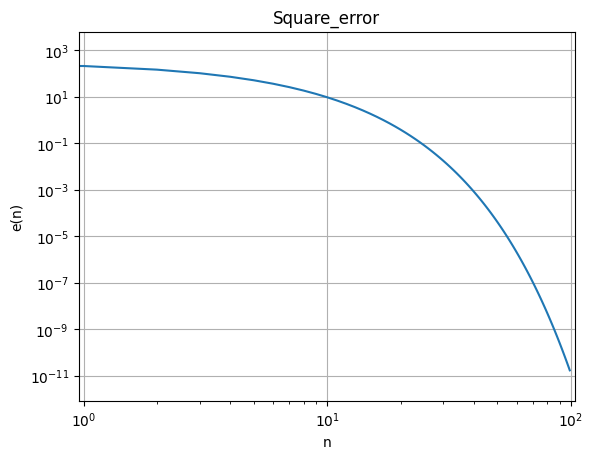

In [10]:
class SolveGrad(SolveMinProbl):

  def run(self, gamma=1e-3, Nit=100):
    self.err=np.zeros((Nit, 2), dtype=float)
    self.gamma=gamma
    self.Nit=Nit
    A=self.matr
    y=self.vect
    w=np.random.rand(self.Nf, )
    for it in range(Nit):
      grad=2*A.T@(A@w-y)
      w= w- gamma * grad
      self.err[it, 0]=it
      self.err[it, 1]= np.linalg.norm(A@w-y)**2
      self.sol=w
      self.min=self.err[it, 1]
  def plot_err(self, title='Square_error', logy=0, logx= 0):
    err=self.err
    plt.figure()
    if (logy==0) & (logx==0):
      plt.plot(err[:, 0], err[:, 1])
    if (logy==1) & (logx==0):
      plt.semilogy(err[:, 0], err[:, 1])
    if (logy==0) & (logx==1):
      plt.semilogx(err[:, 0], err[:, 1])
    if (logy==1) & (logx==1):
      plt.loglog(err[:, 0], err[:, 1])
    plt.xlabel('n')
    plt.ylabel('e(n)')
    plt.title(title)
    plt.margins(0.01, 0.1)
    plt.grid()
    plt.show()
    return
  
if __name__ == "__main__":
  Np=100
  Nf=4
  A=np.random.randn(Np, Nf)
  w=np.random.randn(Nf)
  y=A@w
  m=SolveGrad(y, A)
  m.run()
  m.print_result('Grad')
  m.plot_w_hat('Grad')
  m.plot_err('Square_error', 0, 0)
  m.plot_err('Square_error', 1, 0)
  m.plot_err('Square_error', 0, 1)
  m.plot_err('Square_error', 1, 1)